# Тема 1: Разведочный анализ данных


In [1]:
# будем отображать графики прямо в jupyter'e
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

Matplotlib is building the font cache; this may take a moment.


## Wine Quality: визуализация

In [2]:
wine = pd.read_csv('../../data/winequality-red.csv', sep=';')
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:ylabel='Frequency'>

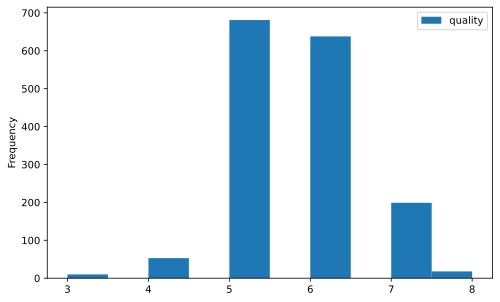

In [3]:
wine.plot(y='quality', kind='hist')

По гистограмме видно, что большая часть вин получили оценку 5, а наименьшая часть получила оценку 3

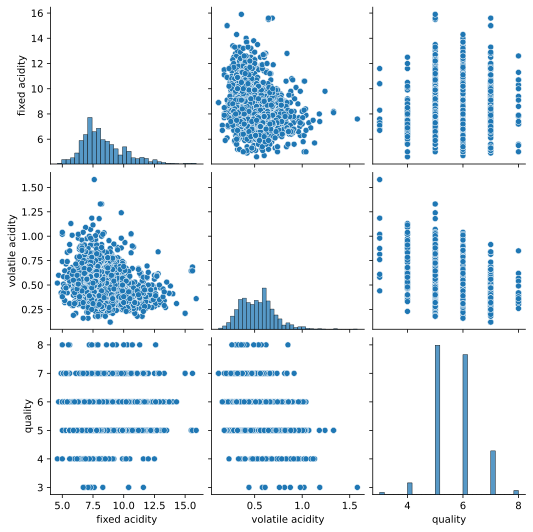

In [4]:
acidity_df = wine[[x for x in wine.columns if 'acidity' in x] + ['quality']]
sns_plot = sns.pairplot(acidity_df)

Посмотрим распределение плотности

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='density', ylabel='Density'>

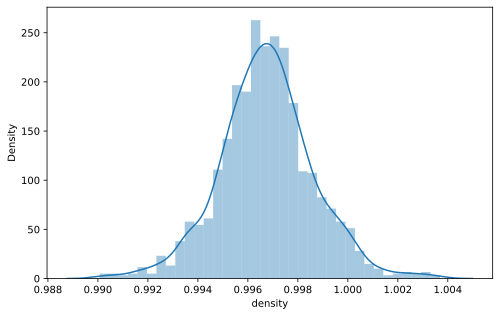

In [5]:
sns.distplot(wine.density)

Построим box plot для качества и фиксированной кислотности

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

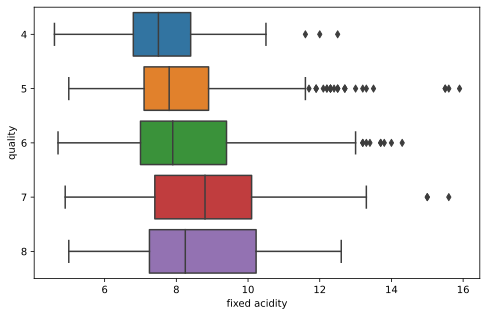

In [6]:
quality_acidity = wine.quality.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y='quality', x='fixed acidity', data=wine[wine.quality.isin(quality_acidity)], orient="h")

## Forestfires: визуализация

In [7]:
ff = pd.read_csv('../../data/forestfires-regression.csv')
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


<AxesSubplot:ylabel='Frequency'>

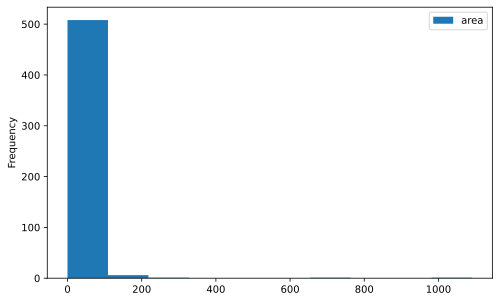

In [8]:
ff.plot(y='area', kind='hist')

Как можно видеть, распределение сгоревших областей очень неравномерное - большая часть пожаров приходится от 0 до 100 Га, очень малая часть - от 100 до 200 Га, в остальных же отрезках число пожаров крайне низкое

<AxesSubplot:ylabel='Frequency'>

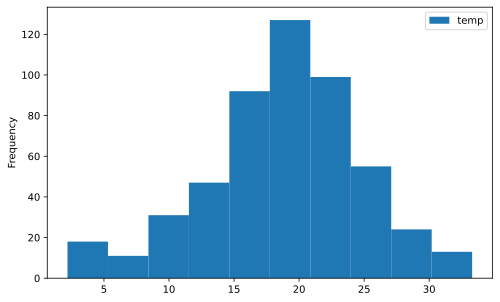

In [9]:
ff.plot(y='temp', kind='hist')

По гистограмме видно, что наибольшее число пожаров приходится на температуру ~20 градусов

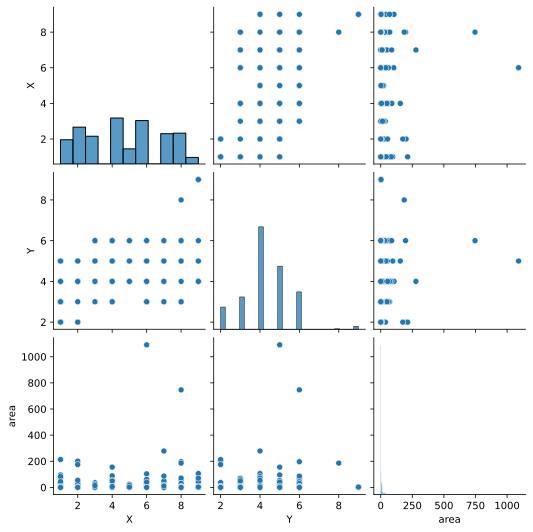

In [10]:
coords_area_ff = ff[['X', 'Y', 'area']]
sns_plot = sns.pairplot(coords_area_ff)

Посмотрим распределение относительной влажности

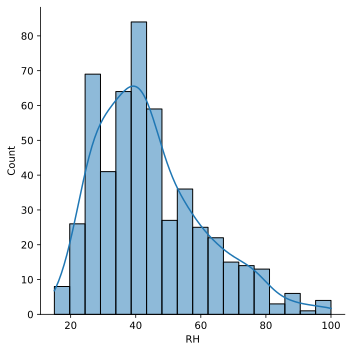

In [11]:
# этот график почему-то отображается не так, как предыдущий dist plot 
sns.displot(ff.RH, kde=True)

Построим box plot для вероятности возгорания и скорости ветра

<AxesSubplot:xlabel='FFMC', ylabel='wind'>

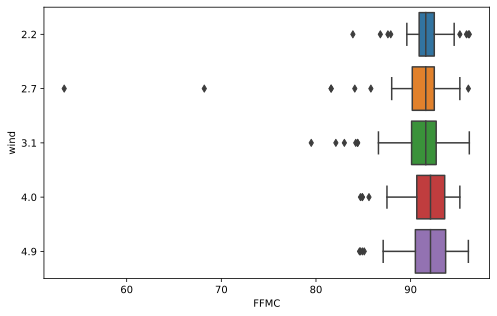

In [12]:
wind_FFMC = ff.wind.value_counts().sort_values(ascending = False).head(5).index.values
sns.boxplot(y='wind', x='FFMC', data=ff[ff.wind.isin(wind_FFMC)], orient="h")

Визуализируем среднюю температуру по месяцам и дням недели

<AxesSubplot:xlabel='month', ylabel='day'>

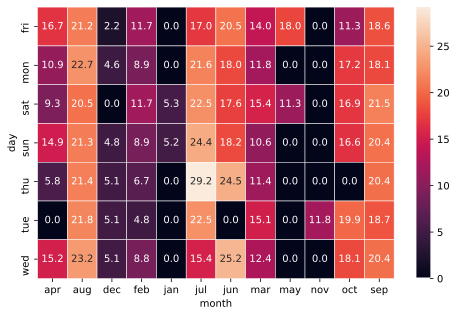

In [13]:
day_month_temp = ff.pivot_table(
                        index='day', 
                        columns='month', 
                        values='temp').fillna(0).applymap(float)
sns.heatmap(day_month_temp, annot=True, fmt=".1f", linewidths=.5)